In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
sns.set(style="whitegrid", font_scale=1.2)

In [5]:
df = pd.read_csv('final_data.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9448 entries, 0 to 9447
Columns: 184 entries, Unnamed: 0 to stateUBPercentViolReported
dtypes: float64(135), int64(30), object(19)
memory usage: 13.3+ MB
Unnamed: 0                             0
communityName                          0
communityname                          0
State                                  0
countyCode                          4926
                                    ... 
stateratePercentViolReported        3782
state90%CIsigPercentViolReported    3782
state95%CIsigPercentViolReported    3782
stateLBPercentViolReported          3782
stateUBPercentViolReported          3782
Length: 184, dtype: int64


In [12]:
# Remove Duplicates
num_duplicates = df.duplicated().sum()
print(num_duplicates)
if num_duplicates > 0:
    df = df.drop_duplicates()

0


In [9]:
# Handeling missing values
missing_counts = df.isnull().sum()
print(missing_counts)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
df.describe().to_csv("descriptive_stats.csv")

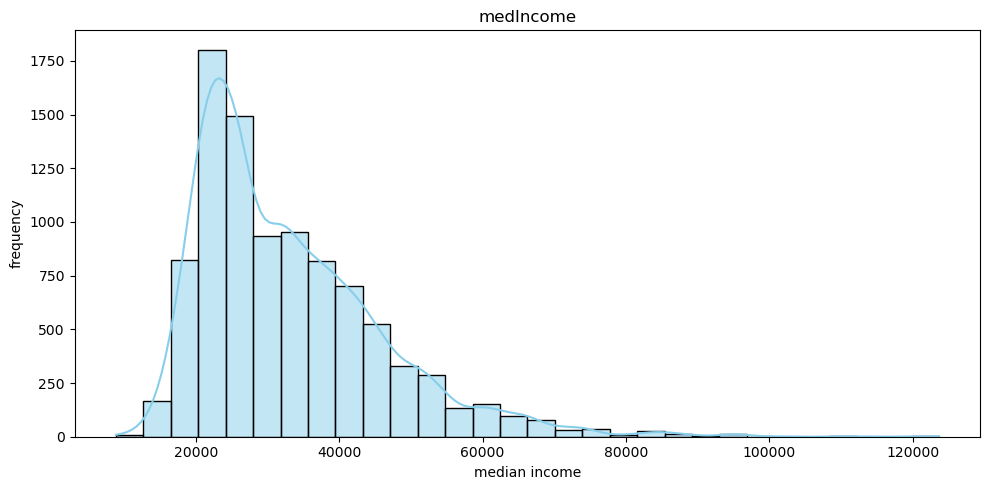

In [19]:
# medIncome_distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['medIncome'], bins=30, kde=True, color='skyblue')

plt.title("medIncome")
plt.xlabel("median income")
plt.ylabel("frequency")

plt.tight_layout()
#plt.savefig("medIncome_distribution.png")
#plt.close()


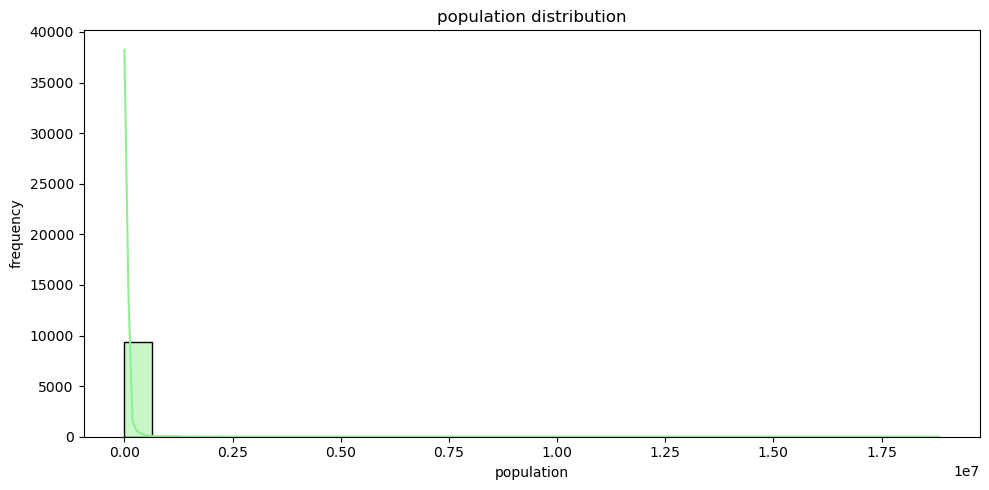

In [18]:
# population_distribution
if 'population' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df['population'], bins=30, kde=True, color='lightgreen')
    plt.title("population distribution")
    plt.xlabel("population")
    plt.ylabel("frequency")
    plt.tight_layout()
    #plt.savefig("population_distribution.png")
    #plt.close()

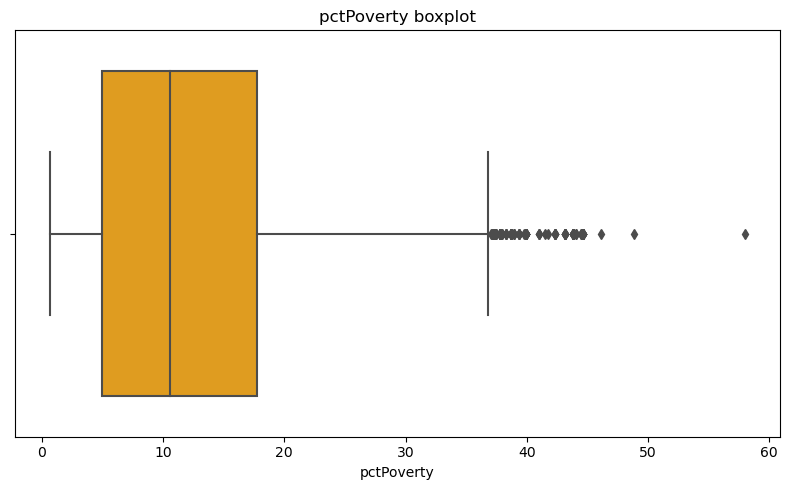

In [17]:
# pctPoverty_boxplot
if 'pctPoverty' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df['pctPoverty'], color="orange")
    plt.title("pctPoverty boxplot")
    plt.xlabel("pctPoverty")
    plt.tight_layout()
    #plt.savefig("pctPoverty_boxplot.png")
    #plt.close()


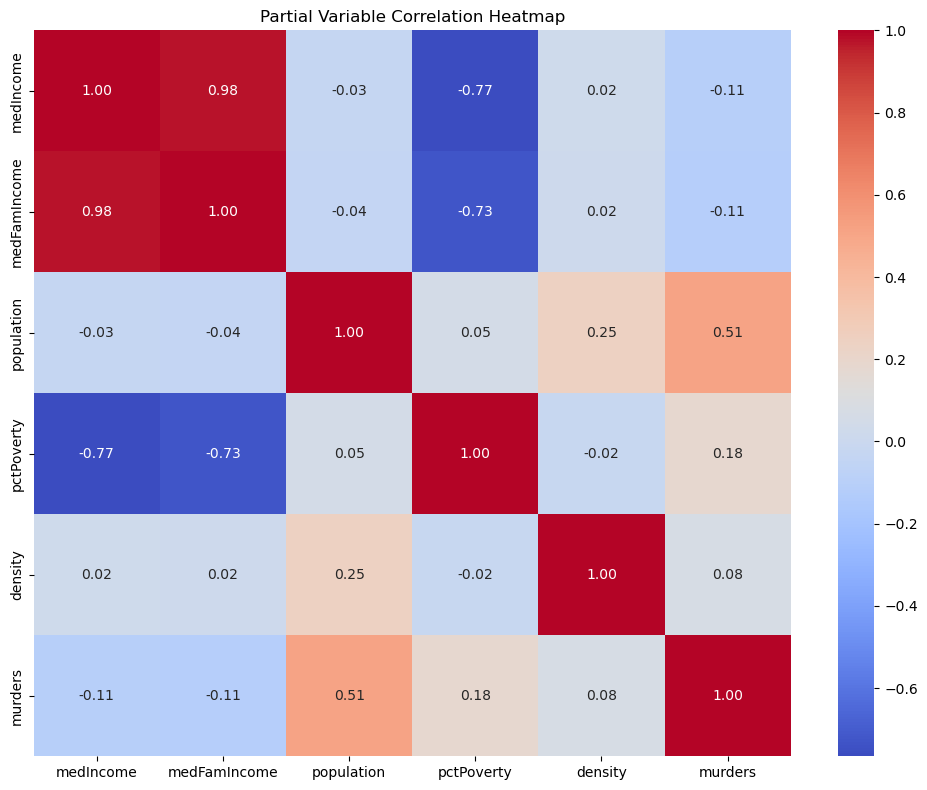

In [22]:
#Heatmap
selected_vars = ['medIncome', 'medFamIncome', 'population', 'pctPoverty', 'density', 'murders']
selected_vars = [var for var in selected_vars if var in df.columns]
if len(selected_vars) > 1:
    plt.figure(figsize=(10, 8))
    corr_matrix = df[selected_vars].corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Heatmap")
    plt.tight_layout()
    #plt.savefig("correlation_heatmap.png")
    #plt.close()
    corr_matrix.to_csv("correlation_matrix.csv")


In [ ]:
#Scatter plots
if len(selected_vars) >= 2:
    pairplot_fig = sns.pairplot(df[selected_vars], diag_kind='kde')
    pairplot_fig.fig.suptitle("Scatter plots", y=1.02)
    #pairplot_fig.savefig("scatter.png")
    #plt.close()

/var/folders/91/n8gppk_x3fsdqswj1f03qd4h0000gn/T/ipykernel_6864/344437120.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['income_poverty_ratio'] = df['medIncome'] / df['medFamIncome']


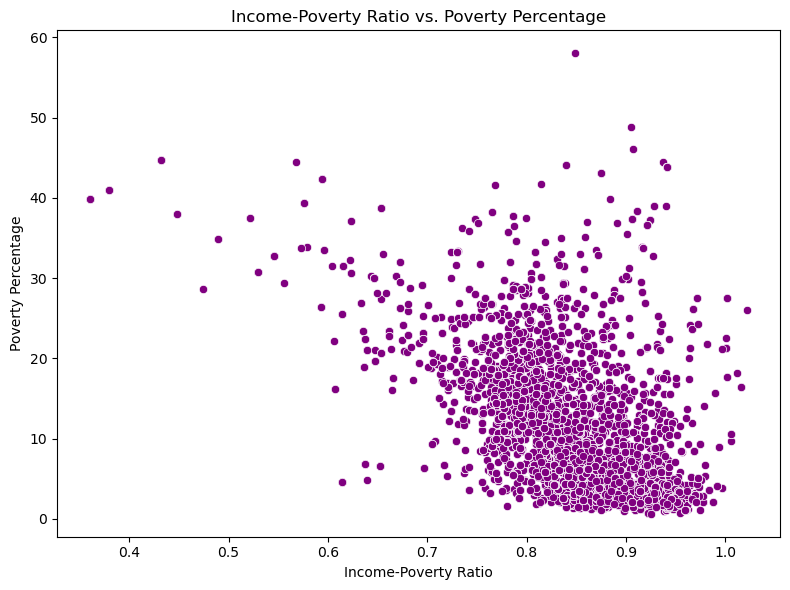

In [23]:
if ('medIncome' in df.columns) and ('medFamIncome' in df.columns):
    df['income_poverty_ratio'] = df['medIncome'] / df['medFamIncome']
    df['income_poverty_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df['income_poverty_ratio'] = df['income_poverty_ratio'].fillna(df['income_poverty_ratio'].median())
    if 'pctPoverty' in df.columns:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x='income_poverty_ratio', y='pctPoverty', data=df, color='purple')
        plt.title("Income-Poverty Ratio vs. Poverty Percentage")
        plt.xlabel("Income-Poverty Ratio")
        plt.ylabel("Poverty Percentage")
        plt.tight_layout()
        #plt.savefig("scatter_income_poverty.png")
        #plt.close()

In [26]:
#PCA

if ('density' in df.columns):
    # classify in three categories：Low, Medium, High
    df['density_category'] = pd.qcut(df['density'], q=3, labels=['Low', 'Medium', 'High'])
    print(df[['density', 'density_category']].head())
df_scaled = df.copy()
scaler = StandardScaler()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])
le = LabelEncoder()
for col in cat_cols:
    df_scaled[col] = le.fit_transform(df_scaled[col])
print(df_scaled[num_cols].describe())
pca = PCA(n_components=0.9)  
pca_components = pca.fit_transform(df_scaled[num_cols])
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
num_components = len(explained_variance)
plt.bar(range(1, num_components + 1), explained_variance, color='teal', alpha=0.7)
plt.xlabel("Principal Component Number")
plt.ylabel("Explained Variance Ratio")
plt.title("Variance Contribution of Principal Components")
plt.xticks(range(1, num_components + 1))
plt.tight_layout()
plt.savefig("pca_variance.png")
plt.close()
components_df = pd.DataFrame(pca.components_, columns=num_cols)
components_df.index = [f'PC{i+1}' for i in range(components_df.shape[0])]
components_df.to_csv("pca_components.csv")
df.to_csv("final_data_cleaned.csv", index=False)



   density density_category
0    389.1           Medium
1   1676.9             High
2   1148.5             High
3    342.9           Medium
4   1874.8             High
        Unnamed: 0    countyCode  communityCode         fold           pop  \
count  9448.000000  9.448000e+03   9.448000e+03  9448.000000  9.448000e+03   
mean      0.000000 -6.016450e-18  -1.789894e-16     0.000000 -1.504112e-17   
std       1.000053  1.000053e+00   1.000053e+00     1.000053  1.000053e+00   
min      -1.731867 -4.919299e-01  -2.451184e+00    -1.543134 -3.151821e-01   
25%      -0.865934 -2.191301e-01  -1.820055e-03    -0.844931 -2.839957e-01   
50%       0.000000 -2.191301e-01  -1.820055e-03    -0.146728 -2.198522e-01   
75%       0.865934 -2.191301e-01  -1.820055e-03     0.900577 -5.038451e-02   
max       1.731867  8.311112e+00   3.023140e+00     1.598781  5.026202e+01   

           perHoush      pctBlack      pctWhite      pctAsian       pctHisp  \
count  9.448000e+03  9.448000e+03  9.448000e+03  9